<a href="https://colab.research.google.com/github/aetabdou97/tp2_comp_num/blob/main/02-Resoudre-des-equations-enonce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Résolution d'équation non linéaires

## Consigne pour les comptes-rendus

Pour les comptes-rendus, deux possibilités au choix: 
- Comptes-rendus sous format d'un notebook (Jupyter)
- Comptes-rendus sous format pdf (LaTeX)

**Compte-rendu sous format d'un notebook:**
pour des comptes-rendus sous format d'un notebook, vous pouvez réaliser directement tout le compte-rendu sur ce notebook. Il devra inclure d'une part des blocs de programmes (en python: "`Code`") qui réalisent les différents exercices proposés, et des blocs de texte (en langage "`Markdown`") dans lequel vous analyserez et discuterez les résultats.


**Compte-rendu sous format pdf (LaTeX):**
vous pouvez également rendre les comptes-rendus sous forme d'un fichier .pdf réalisé en LaTex, à partir de résultats obtenus par les simulations en python. Il devra par exemple inclure des figures obenues par les différents programmes qui réalisent les différents exercices proposés. Dans le compte-rendu, il faudra également analyser et discuter ces résultats. Pensez à joindre les codes des programmes avec le compte-rendu.

**Instructions pour les codes:** 
pour les codes, pensez dans la mesure du possible, à mettre des commentaires (précédés du caractère #) expliquant par exemple ce que fait le code à un endroit donné, ou ce que représentent des variables. Plus un code est propre et bien commeté, plus il est facile à lire.


In [11]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import math

###%matplotlib inline
%matplotlib inline

## Quelques fonctions en Python utiles pour ce TP

### Nombres complexes en Python

Python permet de manipuler des nombres complexes de manière native en utilisant le type de données `complex`. Un nombre complexe est représenté sous la forme`a + b*1j`, où `a` et `b` sont des nombres réels et `1j` est la constante imaginaire.

Voici quelques exemples de manipulation de nombres complexes en Python :

In [2]:
### Nombres complexes: l'unité imaginaire se note 1j 

# Créer des nombres complexes
z1 = 3 + 2j
z2 = 1 - 5j

# Accéder à la partie réelle et imaginaire 
a = z1.real  # a vaut 3.0
b = z1.imag  # b vaut 2.0

# Calculer le conjugé
z_conj = z1.conjugate()  # z_conj vaut 3 - 2j

# Effectuer des opérations arithmétiques 
z3 = z1 + z2  # z3 vaut 4 - 3j
z4 = z1 * z2  # z4 vaut 13 - 13j

# Calcul de la norme (module)
norme = abs(z1)  # norme vaut 

print(z3)

(4-3j)


### Calculer la distance minimum entre plusieurs nombres

Pour déterminer de quel nombre d'une liste un nombre donné est le plus proche, vous pouvez calculer la différence absolue entre le nombre donné et chaque élément de la liste, puis trouver l'élément de la liste correspondant à la différence absolue minimale.

Dans l'exemple suivant, le résultat sera l'indice de l'élément de `liste` le plus proche de `x`.

In [3]:
liste = np.array([1, 3, 6, 9, 12]) # tableau de nombres de reference

x = 5.5 # valeur qu'on a

plus_proche = np.argmin(np.abs(x - liste))


print(f"Parmis les {liste}, c'est {liste[plus_proche]} qui est le plus proche de {x}" )


Parmis les [ 1  3  6  9 12], c'est 6 qui est le plus proche de 5.5


### Tableaux et matrices

Il existe plusieurs facons de déclarer des tableaux et de les initialiser:

In [ ]:
x = np.linspace(0, 1, 5) # renvoie [0.   0.25 0.5  0.75 1.  ]
x = np.zeros(5)          # renvoie [0. 0. 0. 0. 0.]
x = np.ones(5)           # renvoie [1. 1. 1. 1. 1.]

x = np.zeros((5,5))      # renvoie un matrice 5x5 remplie de zeros
print(x)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### Fonctions

Les fonctions sont utiles pour éviter la duplication de code et faciliter la réutilisation de code. En regroupant des instructions dans une fonction, on peut les réutiliser en appelant simplement la fonction avec des paramètres différents. Les fonctions peuvent également être utilisées pour simplifier des tâches complexes en les divisant en sous-tâches plus petites et plus gérables.

Les fonctions en Python sont des blocs de code qui prennent des entrées, effectuent un traitement sur ces entrées, et renvoient un résultat en sortie. Les fonctions sont définies à l'aide du mot-clé `def`, suivi du nom de la fonction, puis des paramètres d'entrée entre parenthèses, et enfin des instructions à exécuter dans la fonction, indentées sous la déclaration de la fonction.

Par exemple, voici une fonction simple qui prend deux paramètres `a` et `b` et renvoie leur somme :

In [4]:
## Une fonction qui prend comme argument a et b, et qui renvoie lleur somme
def somme(a, b):
    s = a + b
    return s
print(somme(2,3))

5


### Représenter des images

Cet exemple crée un tableau 2D de $10x10$ éléments avec des valeurs aléatoires comprises entre 0 et 1, puis affiche le tableau en utilisant la fonction `imshow`. La figure résultante devrait ressembler à une image de bruit blanc.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

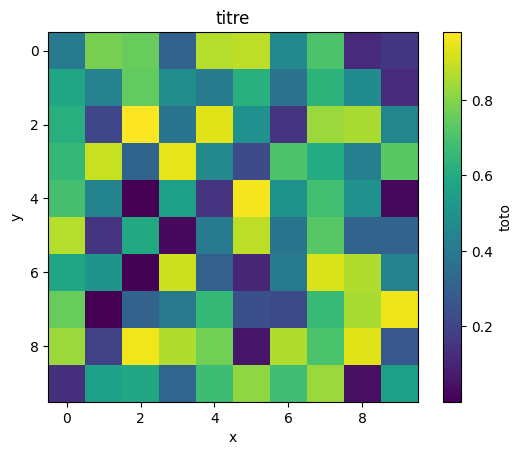

In [12]:
# Création d'un tableau 2D alátoire
X = np.random.rand(10, 10)

# create a figure and axis object
fig, ax = plt.subplots()

# Affichage du tableau en utilisant imshow
im=ax.imshow(X)


# set the axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')

# Définit la colorbar 
cbar = fig.colorbar(im)
cbar.set_label('toto')

# set the title of the plot
ax.set_title('titre')

# display the plot
plt.show()


## Méthode de Newton-Raphson

Soit $f(x)$ une fonction lisse et continue et $x_r$ une racine inconnue de $f(x)$. Supposons maintenant que $x_0$ est une supposition pour $x_r$. À moins que $x_0$ ne soit une supposition très chanceuse, $f(x_0)$ ne sera pas une racine. Compte tenu de ce scénario, nous voulons trouver un $x_1$ qui soit une amélioration par rapport à $x_0$ (c'est-à-dire plus proche de $x_r$ que de $x_0$). Si nous supposons que $x_0$ est "suffisamment proche" de $x_r$, alors nous pouvons l'améliorer en prenant l'approximation linéaire de $f(x)$ autour de $x_0$, qui est une ligne, et en trouvant l'intersection de cette droite avec l'axe des abscisses. Écrit, l'approximation linéaire de $f(x)$ autour de $x_0$ est $f(x) \approx f(x_0) + f^{\prime}(x_0)(x-x_0)$. En utilisant cette approximation, on trouve $x_1$ tel que $f(x_1) = 0$. Brancher ces valeurs dans l'approximation linéaire donne l'équation
$$
0 = f(x_0) + f^{\prime}(x_0)(x_1-x_0),
$$
une fois résolue pour $x_1$, est
$$
x_1 = x_0 - \frac{f(x_0)}{f^{\prime}(x_0)}.
$$
Une illustration de la façon dont cette approximation linéaire améliore une estimation initiale est illustrée dans la figure suivante.

<img src="https://github.com/aetabdou97/tp2_comp_num/blob/main/image/Newton-step.png?raw=1" alt="Newton Step" title="Illustration of Newton step for a smooth function, g(x)." width="300"/>

Écrit de manière générale, un **pas de Newton** calcule une estimation améliorée, $x_i$, en utilisant une estimation précédente $x_{i-1}$, et est donné par l'équation

$$
x_i = x_{i-1} - \frac{g(x_{i-1})}{g^{\prime}(x_{i-1})}.
$$

La **méthode Newton-Raphson** de recherche des racines itère les pas de Newton à partir de $x_0$ jusqu'à ce que l'erreur soit inférieure à la tolérance.

**Exercice:** Encore une fois, $\sqrt{2}$ est la racine de la fonction $f(x) = x^2 - 2$. En utilisant $x_0 = 1,4$ comme point de départ, utilisez l'équation précédente pour estimer $\sqrt{2}$. Comparez cette approximation avec la valeur calculée par la fonction `sqrt` de Python.

$$
x = 1,4 - \frac{1,4^2 - 2}{2(1,4)} = 1,4142857142857144
$$


In [13]:
## Code pour faire une itération de Newton-Raphson pour approximer racine de 2
def f(x): return x**2 - 2
def df(x): return 2*x
newton_raphson = 1.4 - (f(1.4))/(df(1.4))

print("newton_raphson =", newton_raphson)
print("sqrt(2) =", np.sqrt(2))

newton_raphson = 1.4142857142857144
sqrt(2) = 1.4142135623730951


## Applications 0: Entrainement et codages

1) Écrivez une fonction $my\_newton(f, df, x0, tol)$, où la sortie est une estimation de la racine de *f*, *f* est un objet fonction $f(x)$, *df* est un objet fonction à $f^{\prime}(x)$, *x0* est une estimation initiale et *tol* est la tolérance d'erreur. La mesure d'erreur doit être $|f(x)|$.

In [14]:
def my_newton(f,df,x0,tol):
    for i in range(30):
        x0=x0-(f(x0))/(df(x0))
        if np.abs(f(x0)) <tol :
            break
    return x0


2) Utilisez *my\_newton=* pour calculer $\sqrt{2}$ dans la tolérance de 1e-6 à partir de *x0 = 1,5*.

In [100]:
def f(x): return x**2 - 2
def df(x): return 2*x

print("sqrt(2)=",my_newton(f,df,1.5,1e-6))


sqrt(2)= 1.4142135623746899


Si $x_0$ est proche de $x_r$, alors on peut prouver qu'en général, la méthode de Newton-Raphson converge vers $x_r$ beaucoup plus rapidement que la méthode de bissection. Cependant, puisque $x_r$ est initialement inconnu, il n'y a aucun moyen de savoir si la supposition initiale est suffisamment proche de la racine pour obtenir ce comportement à moins que certaines informations spéciales sur la fonction ne soient connues *a priori* (par exemple, la fonction a une racine proche de $x = 0$). En plus de ce problème d'initialisation, la méthode de Newton-Raphson a d'autres limitations sérieuses. Par exemple, si la dérivée à une estimation est proche de 0, alors le pas de Newton sera très grand et s'éloignera probablement de la racine. De plus, selon le comportement de la fonction dérivée entre $x_0$ et $x_r$, la méthode de Newton-Raphson peut converger vers une racine différente de $x_r$ qui peut ne pas être utile pour notre application d'ingénierie.

3) Calculez avec la méthode de Newton les racines de la fonction $f(x) = x^2 -4$ et vérifiez avec le résultat attendu

In [103]:
def f(x): return x**2 - 4
def df(x): return 2*x

print("Une racine de x^^2-4 :",my_newton(f,df,-1,1e-6))

Une racine de x^^2-4 : -2.0000000929222947


## Application 1: Le pendule de Holweck-Lejay

**Voir les TD de méca:**
Une masse ponctuelle $m$ est placée à l’extrémité $A$ d’une tige de longueur $L$, et de masse négligeable, libre de tourner autour de l’axe $Oz$. Un ressort en spiral exerce un couple de rappel $\vec{M}_0 = -C\theta \vec{e}_\theta$ où $C>0$ représente la constante de raideur du ressort. On désigne par $g$ l’intensité du champ de pesanteur.

1. Montrer que les positions d’équilibre $\theta_0$ de la tige sont solution de l’équation
$$\sin\theta_0 = A\theta_0,~~~~~~\text{où}~~~A=\frac{C}{mgL}$$.
2. À partir d’un raisonnement graphique, montrer qu’il existe trois positions d’équilibre lorsque $A<1$ et une seule sinon. Faire ce raisonnement graphique avec Python.
3. L'équation $\sin\theta_0 = A\theta_0$ est une équation transcendante dont les solutions sont en générale inconnues. à l'aide de la méthode de Newton-Raphson, trouver toutes les solutions lorsque $A<1$. Vérifier qu'elles correspondent avec le résultat graphique


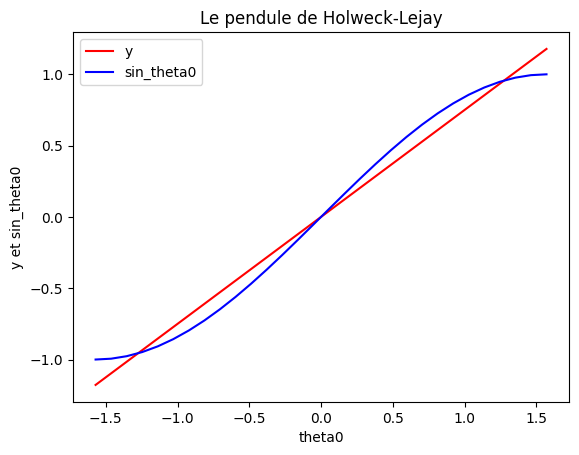

-1.2756998787277012
3.3477500387731757e-09
1.2756998787277012


In [17]:
##graphiques

theta0 = np.linspace(-np.pi/2, np.pi/2, 30)
sin_theta0 = np.sin(theta0)
y = 0.75*theta0

# create a figure and axis object
fig, ax = plt.subplots()

# Tracé des deux courbes
ax.plot(theta0, y, color='red', label='y')
ax.plot(theta0, sin_theta0, color='blue', label='sin_theta0')

# set the axis labels
ax.set_xlabel('theta0')
ax.set_ylabel('y et sin_theta0')

# set the title of the plot
ax.set_title('Le pendule de Holweck-Lejay')

# display the plot
plt.legend()
plt.show()



##méthode de Newton-Raphson
def h(theta0):
    return np.sin(theta0)-0.75*theta0
def dh(theta0):
    return np.cos(theta0)-0.75

theta01=my_newton(h,dh,-1.5,1e-6)
theta02=my_newton(h,dh,0.1,1e-6)
theta03=my_newton(h,dh,1.5,1e-6)

#print(theta01)
#print(theta02)
#print(theta03)

## Application: Les fractales de Newton

On cherchera à déterminer les racines de l'équation $z^3=1$ où $z\in\mathbb{C}$. On notera par la suite $x=\mathrm{Re}\,z$ et $y=\mathrm{Im}\,z$ les parties réeles et imaginaires de $z$. C'est-à-dire $z=x+iy$.



**Exercices préliminaires:**
1. Déterminer analytiquement les racines de l'équation $z^3=1$
2. Écrire un code qui trouve une racine de l'équation $z^3=1$, avec l'algorithme de Newton-Raphson. Vérifiez qu'en fonction du choix initial, on récupère bien les trois racines prédites analytiquement
3. Écrire une fonction qui teste vers quelle racine connue *a priori*, l'algorithme converge. Le test renverra 0,1,2 pour la racine 0,1,2.

**Étude des conditions initiales:** 


1. En utilisant les fonctions précédents, écrire un code qui teste séquentiellement le résultat de la convergence, en fonction de tous les choix initiaux possible dans un domaine prédéterminé. On prendra par exemple le domaine $(x,y)\in[-2;2]\times[-2;2]$, pour 10 valeurs de $x$ et 10 valeurs de $y$. L'ensemble des données dans ce domaine sera donc $10\times10=100$. Le résultat sera donc une matrice $10\times10$, dont les entrées seront 0,1,2 en fonction de quelle racine l'algorithme converge.
2. Représenter l'image du résultat en fonction de la position initiale
3. rafinner un peu  la grille pour avoir une meilleur résolution. 


**Analyse détaillée**
1. Avec une grille relativement fine, étudier comment évolue la carte des solutions en fonction des itérations de Newton, et sauvez les images correspondantes aux cimq premiers pas 
2.


**Structure fractale**
1. On ne peut pas augmenter indéfiniment la résolution. Par contre on peut déplacer et réduire la fenêtre $(x,y)\in[-2;2]\times[-2;2]$ pour zoomer sur des partie intéressantes.
2. Étudier comment évoluent les figures en fonction du zoom.



In [106]:
#racines de z**3=1
def f(z): return z**3-1
def df(z): return 3*(z**2)
print("Une racine de z**3-1 est:",my_newton(f,df,0+1j,1e-6))


#convergence de la racine
liste = np.array([1, np.cos((2*np.pi)/3)+1j*np.sin((2*np.pi)/3), np.cos((4*np.pi)/3)+1j*np.sin((4*np.pi)/3)])
def plus_proche(rac) :return np.argmin(np.abs( rac - liste))
print(f"notre algorithme converge vers la racine {plus_proche(my_newton(f,df,0+1j,1e-6))}" )

#etudes des conditions initiales
size=100
xmin=-2
xmax=2
ymin=-2
ymax=2
mat = np.zeros((size,size))
m=-1
for i in np.linspace(xmin,xmax,size):
    l=-1
    m+=1
    for k in np.linspace(ymin,ymax,size):
        l+=1
        mat[m][l]=plus_proche(my_newton(f,df,i+1j*k,1e-6))
#print(mat)

Une racine de z**3-1 est: (-0.49999999628902975+0.8660253983385868j)
notre algorithme converge vers la racine 1


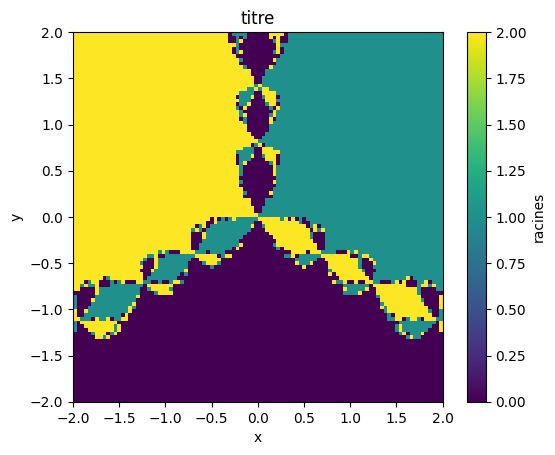

In [107]:
# create a figure and axis object
fig, ax = plt.subplots()

# Affichage du tableau en utilisant imshow
im=ax.imshow(mat,extent=[xmin,xmax,ymin,ymax])


# set the axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')

# Définit la colorbar 
cbar = fig.colorbar(im)
cbar.set_label('racines')

# set the title of the plot
ax.set_title('titre')

# display the plot
plt.show()




Un zoom sur des parties intéressantes nous font voir l'apparition de nouvelles fractales


<img src="https://github.com/aetabdou97/tp2_comp_num/blob/main/image/zoom_fractales.png?raw=1" alt="fractal"  width="400"/>

### Code optimisé

## Pour aller plus loin -- Exercies facultatifs 
Une question légitime est de savoir si ce comportement de l'algorithme de Newton produisant des structures fractales, est une particularité du polynome $z^3=1$ ou bien s'il est inhérent à la méthode.

Une fois résolue l'analyse du problème des fractales de Newton, on pourra s'intéresser à des polynomes différents.

## Pour aller plus loin -- Optimisation et `scipy`

Ces algorithmes ne sont pas tres optimisés. On pourra chercher a reproduire ces choses avec la librairie `scipy`

Comme vous pouvez le penser, Python a les fonctions déjà existantes de recherche de racine que nous pouvons utiliser pour faciliter les choses. La fonction que nous allons utiliser pour trouver la racine est `f_solve` de `scipy.optimize`.

La fonction `f_solve` prend de nombreux arguments que vous pouvez trouver dans la [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html), mais le plus important deux est la fonction dont vous voulez trouver la racine et la supposition initiale.

**Exercice** Calculez la racine de la fonction $f(x) = x^3 - 100x^2 - x + 100$ en utilisant *f_solve*.

In [ ]:
from scipy.optimize import fsolve

f = lambda x: x**3-100*x**2-x+100

fsolve(f, [2, 80])


ModuleNotFoundError: No module named 'scipy'

## Exercises supplementaires

On pourra trouver des exercices supplémentaires sur ce [lien](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.06-Summary-and-Problems.html) (en anglais)

In [ ]:
print("test")